In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
boston = pd.read_csv('boston.csv')

In [5]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Preparing The Dataset

In [11]:
boston['Price'] = boston["MEDV"]
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,36.2


In [13]:
boston.drop(['MEDV'],axis=1,inplace=True)

In [15]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [19]:
#Check the missing value
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
Price      0
dtype: int64

In [21]:
#Exploratory Data Analysis
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


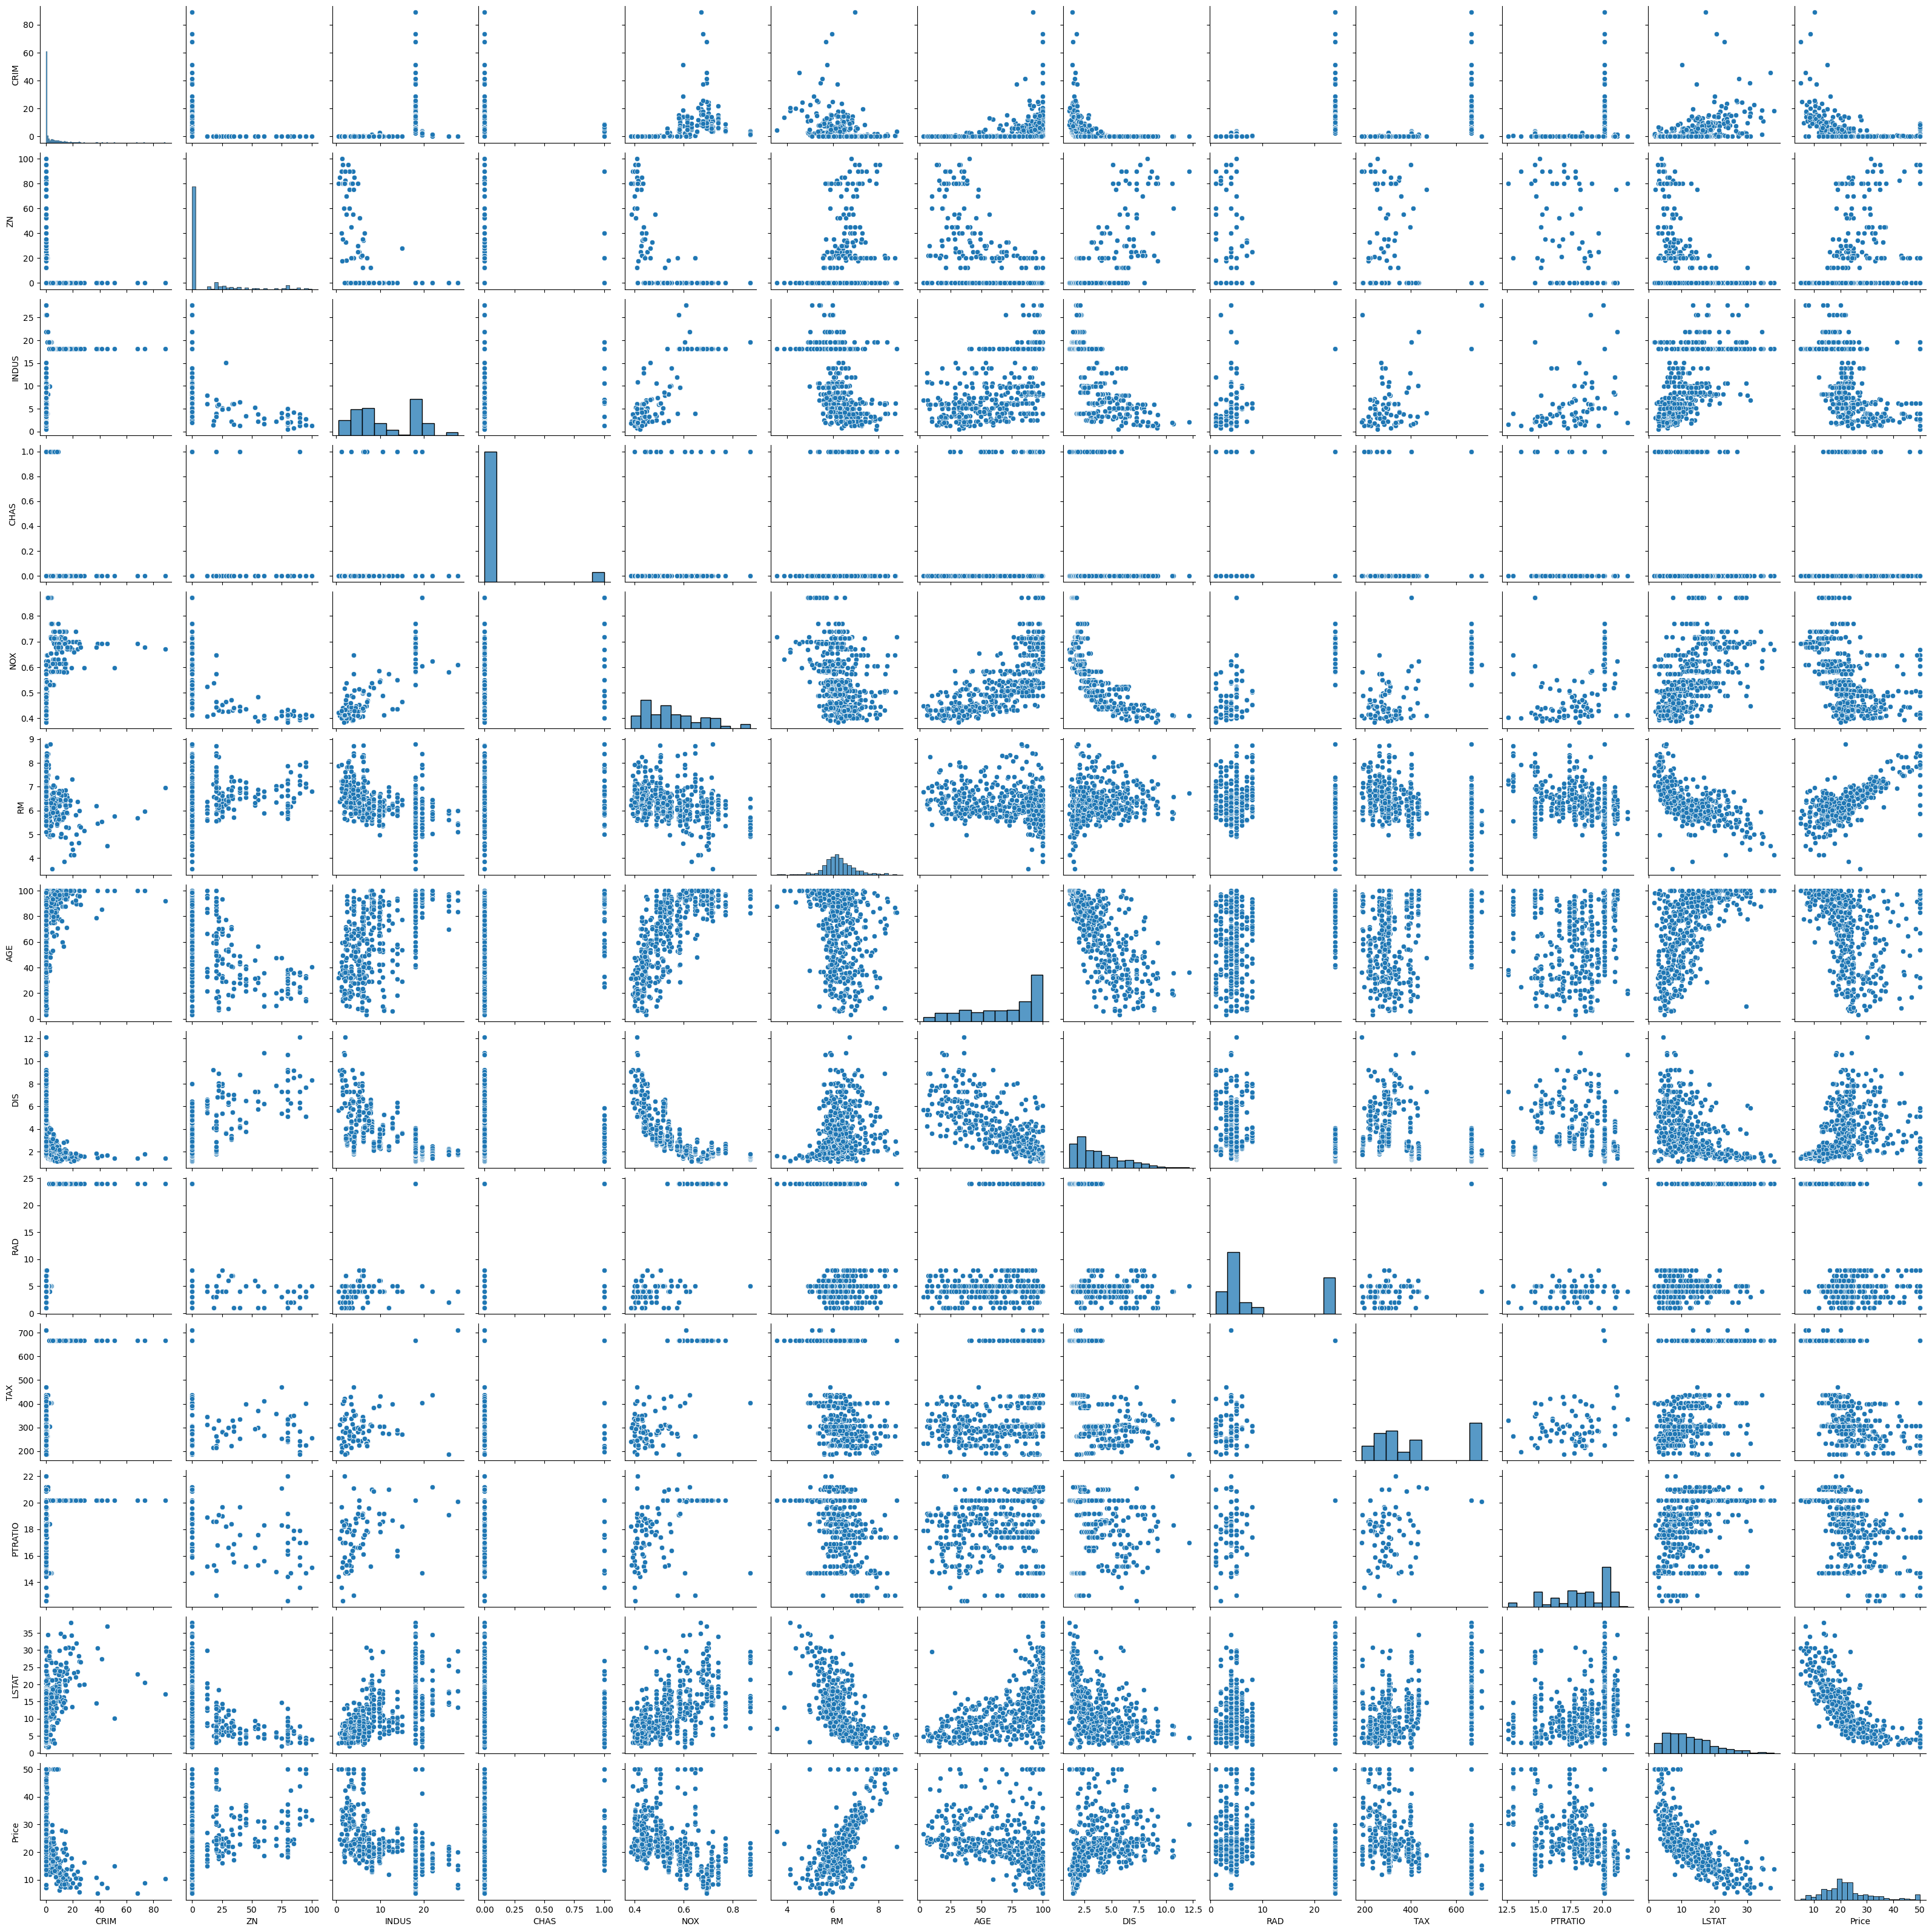

In [25]:
import seaborn as sns
sns.pairplot(boston)

## Analyzing The Correlated Features

In [30]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


<Axes: xlabel='CRIM', ylabel='Price'>

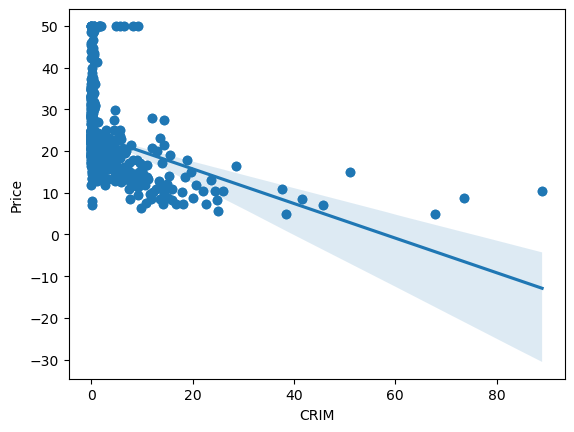

In [53]:
plt.scatter(boston['CRIM'],boston['Price'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')
sns.regplot(x='CRIM', y='Price',data=boston)

Text(0, 0.5, 'Price')

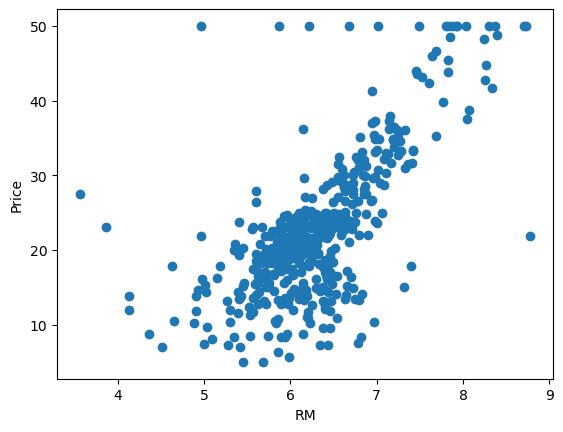

In [36]:
plt.scatter(boston['RM'],boston['Price'])
plt.xlabel('RM')
plt.ylabel('Price')

<Axes: xlabel='LSTAT', ylabel='Price'>

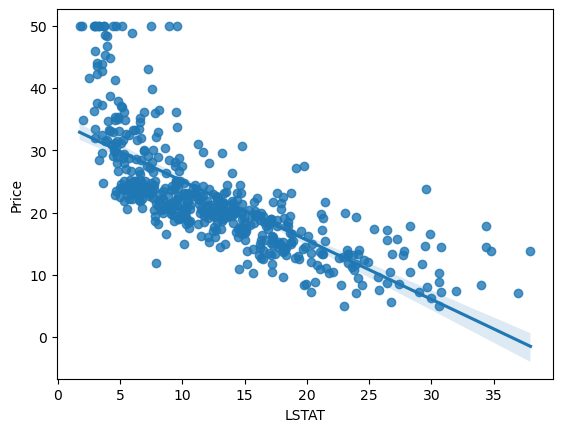

In [51]:
sns.regplot(x='LSTAT', y='Price',data=boston)

<Axes: xlabel='PTRATIO', ylabel='Price'>

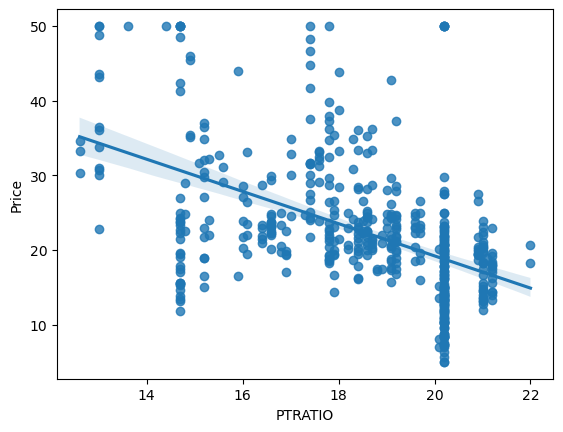

In [49]:

sns.regplot(x='PTRATIO', y='Price',data=boston)

In [57]:
## Independent dan Dependent Features
X = boston.iloc[:,:-1]
y = boston.iloc[:,-1]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


In [59]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,23.27


In [61]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0,0.740,6.406,97.2,2.0651,24,666,20.2,19.52
23,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307,21.0,19.88
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,4.63
433,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666,20.2,16.22


In [63]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [65]:
X_train = scaler.fit_transform(X_train)

In [67]:
X_test = scaler.fit_transform(X_test)

In [69]:
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ..., -1.11279004,
         0.18727079, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ...,  0.15008778,
        -0.21208981, -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -1.0466393 ,
        -0.16771641, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.76399522,
        -0.56707702, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  1.5572945 ,
         0.8528718 ,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ..., -0.13857001,
         1.16348561, -0.25218837]])

In [71]:
X_test

array([[-0.41814319, -0.45257245, -1.06299571, ..., -0.66449292,
        -1.2129824 , -0.5785895 ],
       [-0.42197518,  1.15375592, -0.70943587, ..., -0.90713565,
        -0.67841202, -1.34619278],
       [-0.41662948, -0.45257245,  2.48608589, ...,  1.73304831,
         0.65801394,  0.67938829],
       ...,
       [-0.37095894, -0.45257245, -0.74089671, ..., -0.60094363,
        -0.78532609, -1.19295074],
       [ 0.17707231, -0.45257245,  1.04188384, ...,  1.47307396,
         0.71147097,  0.42166305],
       [ 0.64807771, -0.45257245,  1.04188384, ...,  1.47307396,
         0.71147097,  0.45231146]])

## Model Training

In [74]:
from sklearn.linear_model import LinearRegression

In [76]:
regression = LinearRegression()

In [78]:
regression.fit(X_train,y_train)

LinearRegression()

In [80]:
print(regression.coef_)

[-1.16096196  0.81544469  0.25150446  0.90388642 -1.86406727  2.8008198
 -0.24506311 -2.94795852  1.89664169 -1.52987704 -2.00684723 -4.07422149]


In [82]:
print(regression.intercept_)

23.01581920903955


In [84]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [86]:
## Prediction WIth test Data
reg_pred = regression.predict(X_test)

In [88]:
reg_pred

array([30.63619854, 38.96046735, 16.27298049, 26.74545762, 19.29141918,
       24.82403167, 18.69501462, 14.79867101, 23.56294806, 21.7625697 ,
       27.10301814, 20.30363466, -3.3673576 , 23.21322078, 20.41395958,
       27.0555098 , 21.58070663,  5.72983262, 42.92406834, 17.88395627,
       28.86627098, 31.78262933, 12.0954168 , 25.29672972, 19.28649134,
       16.6902519 , 24.38886381, 19.56449662, 24.3948705 , 20.39818579,
       23.83593085, 26.53066967, 26.14512013, 18.88088261, 17.66411925,
       20.60660038, 32.98850955, 21.21035395, 26.08497716, 26.37187173,
       14.78134425, 33.48930123, 45.04199532, 18.70754618, 28.90886112,
       17.44317312, 15.08512441, 27.58566764, 20.67896042, 32.32436725,
       23.05459362, 36.46645899, 16.51346071, 27.39894863, 42.11078224,
       23.47307573, 19.278909  , 34.45031923, 26.42544687, 13.83339131,
       23.76693514, 32.29110706, 33.51997136, 18.33381684, 22.64213102,
       18.35148852, 20.85781178, 27.52905588, 32.56222223, 16.70

## Asssumption

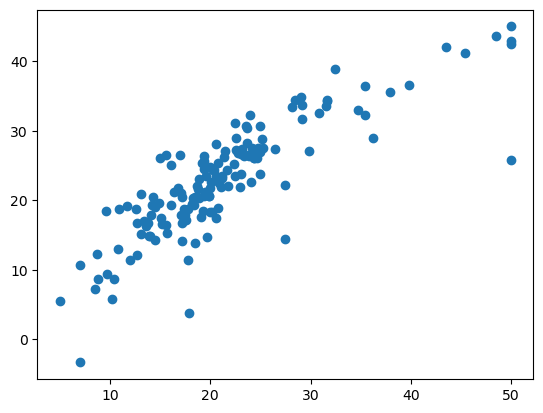

In [90]:
#if the plot like linear indicates model actually done and predicting well okay
##plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

## Residuals

In [92]:
# another plot with respect to residual
#residual means error
#See difference between y_test and regression
residuals = y_test-reg_pred
residuals

173   -7.036199
274   -6.560467
491   -2.672980
72    -3.945458
452   -3.191419
         ...   
441   -0.744713
23     0.265510
225    7.484954
433   -6.230010
447   -6.116817
Name: Price, Length: 152, dtype: float64

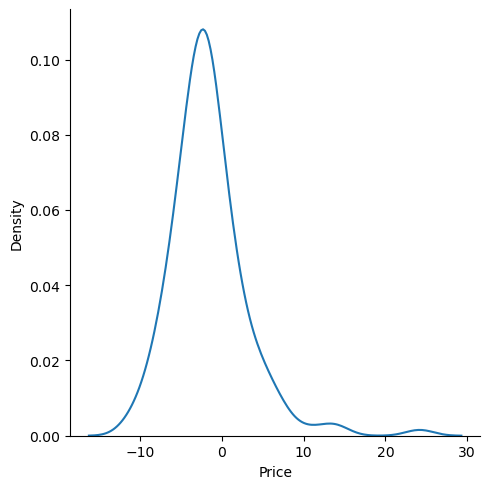

In [98]:
#Plot the residuals
sns.displot(residuals,kind="kde")

In [100]:
##from the plot we can see data normalise are from -10 to 10 and the other data are error (10-30)
##conslusion : the distribute data are normal

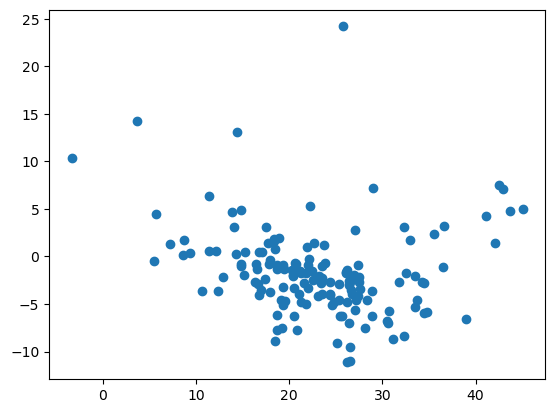

In [102]:
#Scatter plot with respect to prediction and residuals
#uniform distribution
plt.scatter(reg_pred,residuals)

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.7380849114315335
24.02060774086947
4.90108230300915


## R square and adjusted R square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [109]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.6776324006161931


### Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [113]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.649802104266512

## New Data Prediction

## Pickling The Model file For Deployment

In [125]:
import pickle

In [127]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [129]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))